In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Stammdaten.csv", low_memory=False)


In [3]:
categorical_columns = ["Material number", "Supplier", "Contract", "Contract Position", "Procurement type", 
                                    "Special procurement type", "Dispatcher", "Buyer", "Purchasing group", 
                                    "Purchasing lot size", "Calendar", "Plant", "Plant information record", 
                                    "Information record number", "Information record type",  "Product group",
                                    "Base unit"]
numerical_columns = ["Fulfillment time", "Fixed contract 1", "Fixed contract 2", "Total quantity", "Total value", 
                                  "Price unit", "Plant processing time", "Material master time"]

In [4]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder



class Data_Preprocessing():
    def __init__(self, file_path) -> None:
        self.data = pd.read_csv(file_path, low_memory=False, nrows=3000)
        
        self.rename_to_english()
        
        print(self.data.columns)
        
        # Specify categorical and numerical numbers manually
        self.categorical_columns = ["Material number", "Supplier", "Contract", "Contract Position", "Procurement type", 
                                    "Special procurement type", "Dispatcher", "Buyer", "Purchasing group", 
                                    "Purchasing lot size", "Calendar", "Plant", "Plant information record", 
                                    "Information record number", "Information record type",  "Product group",
                                    "Base unit"]
        self.numerical_columns = ["Fulfillment time", "Fixed contract 1", "Fixed contract 2", "Total quantity", "Total value", 
                                  "Price unit", "Plant processing time", "Material master time"]
        
        # Initialize MinMaxScaler
        self.scaler = MinMaxScaler()
    
    def rename_to_english(self):
        self.data.rename(columns={"Materialnummer": "Material number", "Lieferant OB": "Supplier", "Vertrag OB": "Contract", 
                                 "Vertragsposition OB": "Contract Position", "Planlieferzeit Vertrag": "Fulfillment time", 
                                 "Vertrag Fix1": "Fixed contract 1", "Vertrag_Fix2": "Fixed contract 2", "Beschaffungsart": 
                                 "Procurement type", "Sonderbeschaffungsart": "Special procurement type", "Disponent":
                                 "Dispatcher", "Einkäufer": "Buyer", "DispoGruppe": "Purchasing group", "Dispolosgröße": 
                                 "Purchasing lot size", "Gesamtbestand": "Total quantity", "Gesamtwert": "Total value",
                                 "Preiseinheit": "Price unit", "Kalender": "Calendar", "Werk OB": "Plant", "Werk Infosatz":
                                 "Plant information record", "Infosatznummer": "Information record number", "Infosatztyp":
                                 "Information record type", "WE-Bearbeitungszeit": "Plant processing time", "Planlieferzeit Mat-Stamm":
                                 "Material master time", "Warengruppe": "Product group", "Basiseinheit": "Base unit"}, inplace=True)

    def normalize_data(self, numerical_data):
        # Fit and transform the data
        normalized_data = self.scaler.fit_transform(numerical_data)

        return normalized_data

    def preprocess_data(self):
        self.data[self.categorical_columns] = self.data[self.categorical_columns].astype('category')
        self.data[self.numerical_columns] = self.data[self.numerical_columns].astype('int64')


        # If Delivery time is 0, the value is missing
        self.data["Fulfillment time"] = self.data["Fulfillment time"].replace(0, np.nan)
        self.data["Material master time"] = self.data["Material master time"].replace(0, np.nan)

        # If processing time is 0, the value is missing
        self.data["Plant processing time"] = self.data["Plant processing time"].replace(0, np.nan)

        # If total quantity is 0, the value is missing
        self.data["Total quantity"] = self.data["Total quantity"].replace(0, np.nan)

        # If total value is 0, the toal value is not known or missing
        self.data["Total value"] = self.data["Total value"].replace(0, np.nan)

        self.data["Fixed contract 1"] = self.data["Fixed contract 1"].replace(0, np.nan)
        self.data["Fixed contract 2"] = self.data["Fixed contract 2"].replace(0, np.nan)


        return self.data
    

    def preprocess_dbscan(self, data):
        numerical_columns = ["Fulfillment time", "Fixed contract 1"]
        data = data[numerical_columns]

        # Remove rows with NaN values
        data_without_nan = data.dropna(axis=0)

        return data_without_nan
    
    def preprocess_data_kmean(self):
        """
        Preprocess the data by imputing missing values, performing one-hot encoding for categorical variables,
        and performing feature normalization.

        Parameters:
        - data: pandas DataFrame containing the dataset

        Returns:
        - processed_data: pandas DataFrame containing imputed missing values, one-hot encoded features, and normalized features
        """
        # Separate numeric and categorical columns
        # numeric_cols = data.select_dtypes(include=np.number).columns
        # categorical_cols = data.select_dtypes(include='object').columns

        #data = data[numerical_columns]

        self.data=self.preprocess_data()

        not_scaled_data = self.data.copy()

        # categorical_cols = ["Materialnummer", "Lieferant OB", "Vertragsposition OB", "Beschaffungsart", "Disponent", "Einkäufer", "Dispolosgröße", "Werk OB", "Warengruppe", "Basiseinheit"]
        # numeric_cols = ["Planlieferzeit Vertrag", "Vertrag Fix1", "Vertrag_Fix2", "Gesamtbestand", "Gesamtwert", "Preiseinheit", "WE-Bearbeitungszeit", "Planlieferzeit Mat-Stamm"]
        
        # Impute missing values using mean imputation for numeric columns
        # imputer = SimpleImputer(strategy='mean')
        # data_numeric_imputed = pd.DataFrame(imputer.fit_transform(self.data[self.numerical_columns]), columns=self.numerical_columns)

        # One-hot encode categorical variables
        if len(self.categorical_columns) > 0:
            encoder = OneHotEncoder(drop='first')
            data_encoded = encoder.fit_transform(self.data[self.categorical_columns])
            column_names = encoder.get_feature_names_out(self.categorical_columns)
            data_imputed_encoded = pd.DataFrame(data_encoded.toarray(), columns=column_names)
        else:
            data_imputed_encoded = pd.DataFrame()

        # Combine numeric and encoded categorical columns
        processed_data = pd.concat([self.data[self.numerical_columns], data_imputed_encoded], axis=1)


        # Normalize features
        scaler = StandardScaler()
        processed_data = pd.DataFrame(scaler.fit_transform(processed_data), columns=processed_data.columns)


        return processed_data, not_scaled_data

Index(['Material number', 'Supplier', 'Contract', 'Contract Position',
       'Fulfillment time', 'Fixed contract 1', 'Fixed contract 2',
       'Procurement type', 'Special procurement type', 'Dispatcher', 'Buyer',
       'Purchasing group', 'Purchasing lot size', 'Total quantity',
       'Total value', 'Price unit', 'Calendar', 'Plant',
       'Plant information record', 'Information record number',
       'Information record type', 'Plant processing time',
       'Material master time', 'Product group', 'Base unit'],
      dtype='object')


f:\1.Programming\1.PYTHON\Virtual_Env\custom_cv\lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
f:\1.Programming\1.PYTHON\Virtual_Env\custom_cv\lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
f:\1.Programming\1.PYTHON\Virtual_Env\custom_cv\lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


      Fulfillment time  Fixed contract 1  Fixed contract 2  Total quantity  \
0                  NaN               NaN               NaN             NaN   
1                  NaN               NaN               NaN             NaN   
2                  NaN               NaN               NaN             NaN   
3                  NaN               NaN               NaN             NaN   
4                  NaN               NaN               NaN             NaN   
...                ...               ...               ...             ...   
2995               NaN               NaN               NaN             NaN   
2996               NaN               NaN               NaN             NaN   
2997               NaN               NaN               NaN             NaN   
2998               NaN               NaN               NaN             NaN   
2999               NaN               NaN               NaN             NaN   

      Total value  Price unit  Plant processing time  Material 

f:\1.Programming\1.PYTHON\Virtual_Env\custom_cv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
f:\1.Programming\1.PYTHON\Virtual_Env\custom_cv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
f:\1.Programming\1.PYTHON\Virtual_Env\custom_cv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
f:\1.Programming\1.PYTHON\Virtual_Env\custom_cv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
f:\1.Programming\1.PYTHON\Virtual_Env\custom_cv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
f:\1.Programming\1.PYTHON\Virtual_Env\custom_

0       0
1       0
2       0
3       0
4       0
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Name: anomaly_label, Length: 3000, dtype: int32


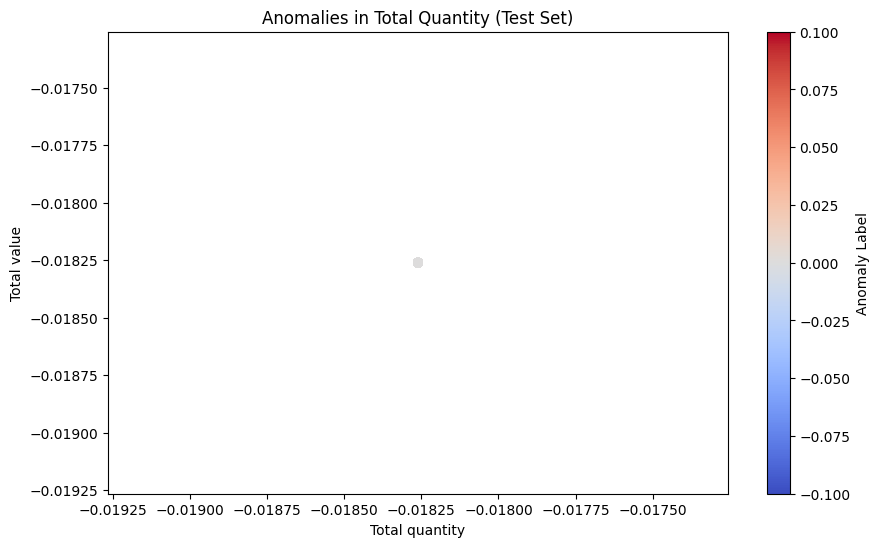

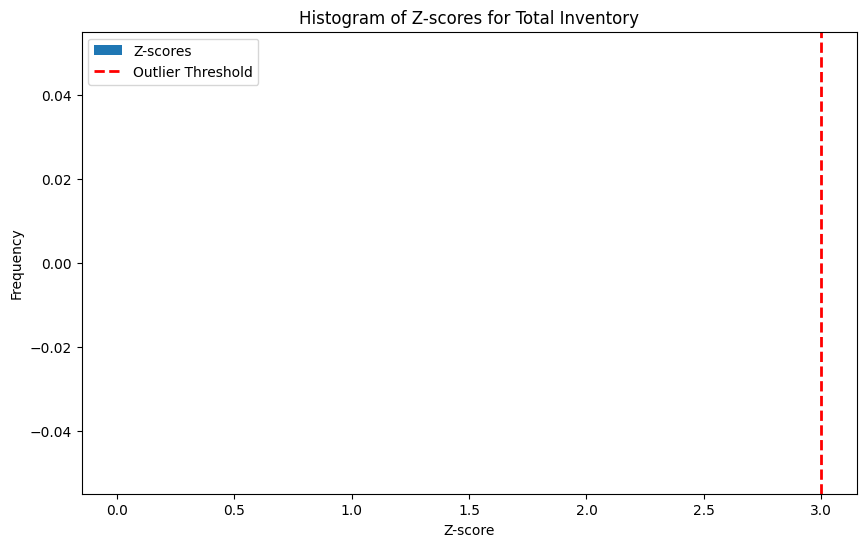

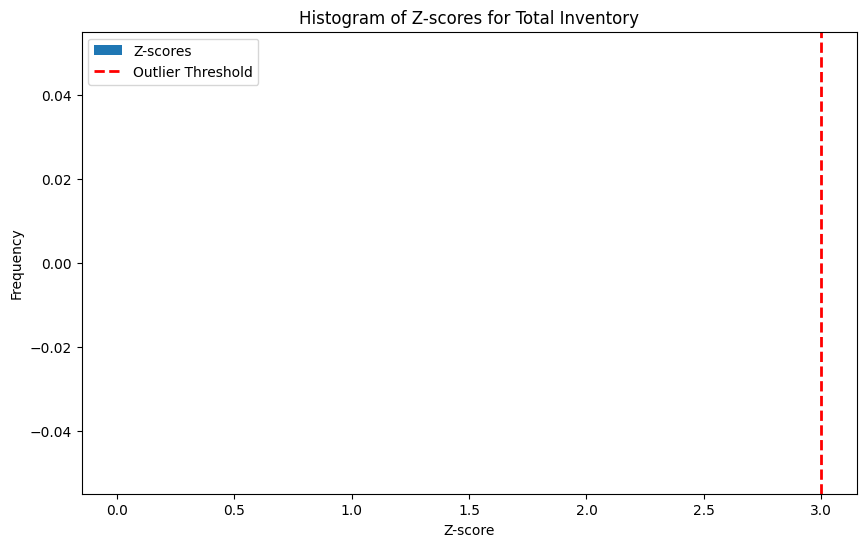

In [18]:
categorical_columns = ["Material number", "Supplier", "Contract", "Contract Position", "Procurement type", 
                                    "Special procurement type", "Dispatcher", "Buyer", "Purchasing group", 
                                    "Purchasing lot size", "Calendar", "Plant", "Plant information record", 
                                    "Information record number", "Information record type",  "Product group",
                                    "Base unit"]
numerical_columns = ["Fulfillment time", "Fixed contract 1", "Fixed contract 2", "Total quantity", "Total value", 
                                  "Price unit", "Plant processing time", "Material master time"]

file_path = 'Stammdaten.csv'

Data = Data_Preprocessing(file_path=file_path)
data, not_processed_data = Data.preprocess_data_kmean()
print(data)

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.svm import SVC  # Importing SVM
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Encode categorical variables
# categorical_columns = data.select_dtypes(include=['object']).columns
# data[categorical_columns] = data[categorical_columns].apply(lambda col: pd.factorize(col)[0])

# Handling missing values by replacing them with the median of each column
for col in numerical_columns:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())

# Applying Z-score for anomaly detection in numeric columns
# Calculate mean and standard deviation for each numerical column
mean_values = data[numerical_columns].mean()
std_dev_values = data[numerical_columns].std()

# Calculate Z-scores for each numerical column
z_scores = (data[numerical_columns] - mean_values) / std_dev_values

# Optionally, you can add the Z-scores as new columns to the existing DataFrame
for col in numerical_columns:
    if col in data.columns:
        data[f'{col}_z_score'] = z_scores[col]

# Create a DataFrame to store the outlier flags
outlier_flags = pd.DataFrame()

# Apply outlier detection threshold (e.g., Z-score > 3) to identify outliers
for col in numerical_columns:
    if col in data.columns:
        outlier_flags[col + '_outlier'] = (z_scores[col] > 3).astype(int)

# Combine all outlier flags to a single anomaly label
data['anomaly_label'] = outlier_flags.max(axis=1)

# No need to drop outlier flags columns since they haven't been added yet
# Concatenate the anomaly label column with the input data
data = pd.concat([data, outlier_flags], axis=1)

# Combine all outlier flags to a single anomaly label
data['anomaly_label'] = data[[col + '_outlier' for col in numerical_columns if col in data.columns]].max(axis=1)

features = data.drop(columns=[col + '_z_score' for col in numerical_columns if col in data.columns])
# Remove columns related to anomaly detection from the input data

# Assuming 'data' is your DataFrame containing numerical features and 'anomaly_label' is the binary target variable

# Split data into features and target variable
X = data.drop(columns=['anomaly_label'])
y = data['anomaly_label']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model (replace XGBoost with SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict anomalies on the testing data
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probability of being an outlier
y_pred = svm_model.predict(X_test)  # Binary prediction (0 or 1)

# You can now use y_pred_proba or y_pred for further analysis or evaluation
data_without_nan = data.dropna(subset=['Total quantity_z_score'])

print(data['anomaly_label'])

import matplotlib.pyplot as plt

# Define a function to create scatter plots for anomalies
def visualize_anomalies(data, anomaly_labels):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Total quantity'], data['Total value'], c=anomaly_labels, cmap='coolwarm')
    plt.xlabel('Total quantity')
    plt.ylabel('Total value')
    plt.title('Anomalies in Total Quantity')
    plt.colorbar(label='Anomaly Label')
    plt.show()

# Visualize anomalies in the test set only
def visualize_anomalies_test(X_test, y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, numerical_columns.index('Total quantity')], 
                X_test[:, numerical_columns.index('Total value')], 
                c=y_pred, cmap='coolwarm')
    plt.xlabel('Total quantity')
    plt.ylabel('Total value')
    plt.title('Anomalies in Total Quantity (Test Set)')
    plt.colorbar(label='Anomaly Label')
    plt.show()

# Visualize anomalies in the test set
visualize_anomalies_test(X_test, y_test, y_pred)

# Visualize statistical outliers in one of the numeric columns
plt.figure(figsize=(10, 6))
plt.hist(data_without_nan['Total quantity_z_score'], bins=50, label='Z-scores')
plt.axvline(3, color='red', linestyle='dashed', linewidth=2, label='Outlier Threshold')
plt.title('Histogram of Z-scores for Total Inventory')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

import seaborn as sns

# Define a function to create scatter plots for anomalies
# def visualize_anomalies2(data, anomaly_labels):
#     # Pairplot for all numerical features
#     sns.pairplot(data, hue='anomaly_labels', palette={0: 'blue', 1: 'red'})
#     plt.title('Scatter Plot of Numerical Features with Anomalies')
#     plt.show()

# # Visualize anomalies
# visualize_anomalies2(data[numerical_columns], y_pred)

# Visualize statistical outliers in one of the numeric columns
plt.figure(figsize=(10, 6))
plt.hist(data_without_nan['Total quantity_z_score'], label='Z-scores')
plt.axvline(3, color='red', linestyle='dashed', linewidth=2, label='Outlier Threshold')
plt.title('Histogram of Z-scores for Total Inventory')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Save the updated dataset
data.to_csv('updated_with_anomalies_svm_stammdaten.csv', index=False)
